# Neural Network Simple Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data

In [2]:
X = np.stack([[-0.5,0.5,-0.5,0.5],[-0.5,-0.5,0.5,0.5]],axis=1)
y = np.expand_dims(np.array([-0.5,0.5,0.5,-0.5]),-1)
X.shape, y.shape

((4, 2), (4, 1))

In [3]:
input_size = X.shape[1] 
num_examples = X.shape[0] 
hiddenlayer_size = 2 
output_size = y.shape[1] 
epoch=5000 
lr=0.1
print("Number of features in data set: {}".format(input_size))
print("Number of examples in data set: {}".format(num_examples))
print("Number of hidden layers neurons: {}".format(hiddenlayer_size))
print("Number of neurons at output layer: {}".format(output_size))
print("Number training iterations: {}".format(epoch))
print("Learning rate: {}".format(lr))

Number of features in data set: 2
Number of examples in data set: 4
Number of hidden layers neurons: 2
Number of neurons at output layer: 1
Number training iterations: 5000
Learning rate: 0.1


In [40]:
def initialize_parameters(layer_dims=[X.shape[1],hiddenlayer_size,output_size]):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l-1],layer_dims[l])
                    bl -- bias vector of shape (1, layer_dims[l])
    """
    
    np.random.seed(4)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
      
        parameters['W' + str(l)] = np.random.random([layer_dims[l-1],layer_dims[l]])-0.5
        parameters['b' + str(l)] = np.random.random((1,layer_dims[l]))-0.5

        
    return parameters

Testing function

In [41]:
parameters = initialize_parameters()
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.46702984  0.04723225]
 [ 0.47268436  0.21481599]]
b1 = [[ 0.19772882 -0.2839105 ]]
W2 = [[ 0.47627445]
 [-0.49376974]]
b2 = [[-0.24701764]]


In [42]:
# Mean Square erro function
def mse(y,pred):
    return np.sum((y-pred)**2)/(2*num_examples)

In [43]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = np.dot(X,W1)+b1
    a1 = np.tanh(z1)
    z2 = np.dot(a1,W2)+b2
    # Calculating the loss
    data_loss = mse(y,z2)

    return data_loss

In [29]:
#def tanh(x):
 #   return 2/(1+np.exp(-2*x))-1

In [53]:
def build_model(nn_hdim, max_iter=1000, converge=0.05, lr=lr, beta=None):
    """
     This function learns parameters for the neural network with 1 hidden layer and returns the model.
     - nn_hdim: Number of nodes in the hidden layer
     - max_iter: Number of maximum iteration
     - converge: Convergence is reached when your average MSE for the whole dataset is less than 'converge'
     - lr: learning rate
     - 
    """
     
    # Initialize the parameters to random values. We need to learn these.
    parameters = initialize_parameters(layer_dims=[X.shape[1],nn_hdim,output_size])
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
     
    # This is what we return at the end
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    
    #initialize
    i = 0
    costs =[]
    if beta != None:
        VdW1 = np.zeros((W1.shape))
        Vdb1 = np.zeros((b1.shape))
        VdW2 = np.zeros((W2.shape))
        Vdb2 = np.zeros((b2.shape))
        
    # Gradient descent. 
    while calculate_loss(model) > converge and i < max_iter:
        i += 1
 
        # Forward propagation
        z1 = np.dot(X,W1)+b1
        a1 = np.tanh(z1)
        z2 = np.dot(a1,W2)+b2

        # Backpropagation
        dz2 = (z2-y)
        dW2 = np.dot(a1.T,dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)
        # tanh' = 1-(tanh)**2
        dz1 = np.dot(dz2,W2.T)*(1 - (np.tanh(z1))**2)
        dW1 = np.dot(X.T, dz1)
        db1 = np.sum(dz1, axis=0)
 
 
        # Gradient descent parameter update
        if beta == None:
            W1 += -lr * dW1
            b1 += -lr * db1
            W2 += -lr * dW2
            b2 += -lr * db2
            
        else:
            VdW1 = beta*VdW1+(1-beta)*dW1
            Vdb1 = beta*Vdb1+(1-beta)*db1
            VdW2 = beta*VdW2+(1-beta)*dW2
            Vdb2 = beta*Vdb2+(1-beta)*db2
            
            W1 += -lr * VdW1
            b1 += -lr * Vdb1
            W2 += -lr * VdW2
            b2 += -lr * Vdb2
            
        #updates = [(param, param-eta*grad +momentum_constant*vel) for param, grad, vel in zip(self.params, grads, velocities)]  
         
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
         
        print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
        costs.append(calculate_loss(model))
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        #if print_loss and i % 1000 == 0:
         # print "Loss after iteration %i: %f" %(i, calculate_loss(model))
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(lr))
    plt.show()
     
    return model



## NN with 2 hidden units

Loss after iteration 1: 0.124968
Loss after iteration 2: 0.124184
Loss after iteration 3: 0.123534
Loss after iteration 4: 0.122954
Loss after iteration 5: 0.122426
Loss after iteration 6: 0.121940
Loss after iteration 7: 0.121490
Loss after iteration 8: 0.121068
Loss after iteration 9: 0.120671
Loss after iteration 10: 0.120294
Loss after iteration 11: 0.119933
Loss after iteration 12: 0.119585
Loss after iteration 13: 0.119247
Loss after iteration 14: 0.118917
Loss after iteration 15: 0.118592
Loss after iteration 16: 0.118271
Loss after iteration 17: 0.117952
Loss after iteration 18: 0.117633
Loss after iteration 19: 0.117312
Loss after iteration 20: 0.116989
Loss after iteration 21: 0.116662
Loss after iteration 22: 0.116329
Loss after iteration 23: 0.115991
Loss after iteration 24: 0.115645
Loss after iteration 25: 0.115291
Loss after iteration 26: 0.114927
Loss after iteration 27: 0.114553
Loss after iteration 28: 0.114169
Loss after iteration 29: 0.113772
Loss after iteration 30

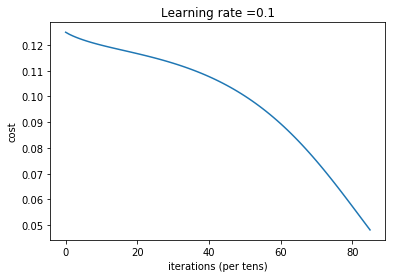

In [54]:
param = build_model(2)

## NN with 4 hidden units

Loss after iteration 1: 0.167004
Loss after iteration 2: 0.136598
Loss after iteration 3: 0.130924
Loss after iteration 4: 0.129602
Loss after iteration 5: 0.129110
Loss after iteration 6: 0.128801
Loss after iteration 7: 0.128551
Loss after iteration 8: 0.128333
Loss after iteration 9: 0.128138
Loss after iteration 10: 0.127962
Loss after iteration 11: 0.127803
Loss after iteration 12: 0.127658
Loss after iteration 13: 0.127526
Loss after iteration 14: 0.127403
Loss after iteration 15: 0.127290
Loss after iteration 16: 0.127185
Loss after iteration 17: 0.127087
Loss after iteration 18: 0.126995
Loss after iteration 19: 0.126909
Loss after iteration 20: 0.126827
Loss after iteration 21: 0.126750
Loss after iteration 22: 0.126677
Loss after iteration 23: 0.126607
Loss after iteration 24: 0.126541
Loss after iteration 25: 0.126477
Loss after iteration 26: 0.126416
Loss after iteration 27: 0.126357
Loss after iteration 28: 0.126301
Loss after iteration 29: 0.126246
Loss after iteration 30

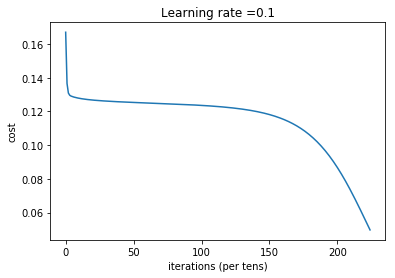

In [55]:
param = build_model(4)

## NN with 6 hidden units

Loss after iteration 1: 0.153332
Loss after iteration 2: 0.147250
Loss after iteration 3: 0.143338
Loss after iteration 4: 0.140334
Loss after iteration 5: 0.137978
Loss after iteration 6: 0.136102
Loss after iteration 7: 0.134586
Loss after iteration 8: 0.133346
Loss after iteration 9: 0.132318
Loss after iteration 10: 0.131455
Loss after iteration 11: 0.130723
Loss after iteration 12: 0.130094
Loss after iteration 13: 0.129547
Loss after iteration 14: 0.129066
Loss after iteration 15: 0.128639
Loss after iteration 16: 0.128255
Loss after iteration 17: 0.127906
Loss after iteration 18: 0.127585
Loss after iteration 19: 0.127288
Loss after iteration 20: 0.127011
Loss after iteration 21: 0.126749
Loss after iteration 22: 0.126500
Loss after iteration 23: 0.126262
Loss after iteration 24: 0.126032
Loss after iteration 25: 0.125810
Loss after iteration 26: 0.125593
Loss after iteration 27: 0.125381
Loss after iteration 28: 0.125173
Loss after iteration 29: 0.124967
Loss after iteration 30

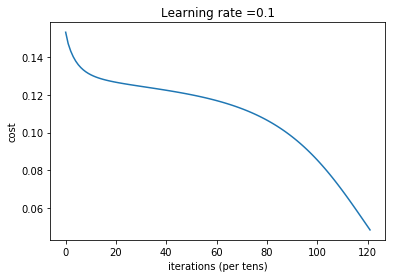

In [56]:
param = build_model(6)

# Momentum 

## NN with momentum and 2 hidden units

Loss after iteration 1: 0.126074
Loss after iteration 2: 0.125815
Loss after iteration 3: 0.125479
Loss after iteration 4: 0.125100
Loss after iteration 5: 0.124708
Loss after iteration 6: 0.124322
Loss after iteration 7: 0.123949
Loss after iteration 8: 0.123588
Loss after iteration 9: 0.123233
Loss after iteration 10: 0.122877
Loss after iteration 11: 0.122513
Loss after iteration 12: 0.122139
Loss after iteration 13: 0.121756
Loss after iteration 14: 0.121371
Loss after iteration 15: 0.120991
Loss after iteration 16: 0.120624
Loss after iteration 17: 0.120276
Loss after iteration 18: 0.119952
Loss after iteration 19: 0.119650
Loss after iteration 20: 0.119370
Loss after iteration 21: 0.119107
Loss after iteration 22: 0.118856
Loss after iteration 23: 0.118610
Loss after iteration 24: 0.118368
Loss after iteration 25: 0.118124
Loss after iteration 26: 0.117880
Loss after iteration 27: 0.117633
Loss after iteration 28: 0.117386
Loss after iteration 29: 0.117139
Loss after iteration 30

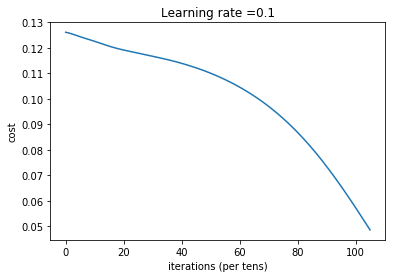

In [57]:
param = build_model(2, beta=0.9)

## NN with momentum and 4 hidden units

Loss after iteration 1: 0.361202
Loss after iteration 2: 0.307055
Loss after iteration 3: 0.246523
Loss after iteration 4: 0.192719
Loss after iteration 5: 0.154113
Loss after iteration 6: 0.133775
Loss after iteration 7: 0.130179
Loss after iteration 8: 0.138775
Loss after iteration 9: 0.153691
Loss after iteration 10: 0.169231
Loss after iteration 11: 0.180981
Loss after iteration 12: 0.186409
Loss after iteration 13: 0.184958
Loss after iteration 14: 0.177700
Loss after iteration 15: 0.166727
Loss after iteration 16: 0.154464
Loss after iteration 17: 0.143082
Loss after iteration 18: 0.134129
Loss after iteration 19: 0.128377
Loss after iteration 20: 0.125869
Loss after iteration 21: 0.126088
Loss after iteration 22: 0.128184
Loss after iteration 23: 0.131194
Loss after iteration 24: 0.134234
Loss after iteration 25: 0.136619
Loss after iteration 26: 0.137936
Loss after iteration 27: 0.138048
Loss after iteration 28: 0.137057
Loss after iteration 29: 0.135235
Loss after iteration 30

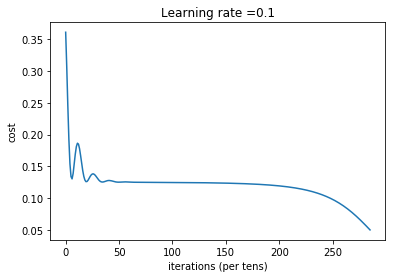

In [58]:
param = build_model(4, beta=0.9)

## NN with momentum and 6 hidden units

Loss after iteration 1: 0.219867
Loss after iteration 2: 0.198794
Loss after iteration 3: 0.176913
Loss after iteration 4: 0.160012
Loss after iteration 5: 0.151050
Loss after iteration 6: 0.149793
Loss after iteration 7: 0.153595
Loss after iteration 8: 0.158786
Loss after iteration 9: 0.162104
Loss after iteration 10: 0.161680
Loss after iteration 11: 0.157354
Loss after iteration 12: 0.150359
Loss after iteration 13: 0.142610
Loss after iteration 14: 0.135950
Loss after iteration 15: 0.131579
Loss after iteration 16: 0.129831
Loss after iteration 17: 0.130253
Loss after iteration 18: 0.131911
Loss after iteration 19: 0.133757
Loss after iteration 20: 0.134949
Loss after iteration 21: 0.135045
Loss after iteration 22: 0.134038
Loss after iteration 23: 0.132261
Loss after iteration 24: 0.130223
Loss after iteration 25: 0.128422
Loss after iteration 26: 0.127205
Loss after iteration 27: 0.126696
Loss after iteration 28: 0.126803
Loss after iteration 29: 0.127285
Loss after iteration 30

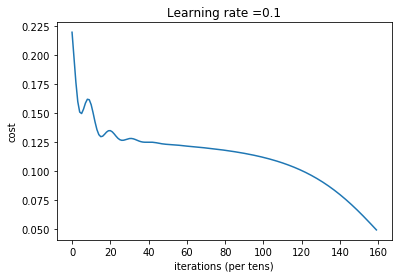

In [59]:
param = build_model(6, beta=0.9)